<a href="https://colab.research.google.com/github/UrvaangNaik/Diabetes-Prediction-/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


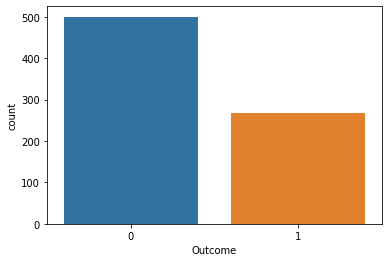

In [8]:
sns.countplot('Outcome',data=df)

# Pregnancies

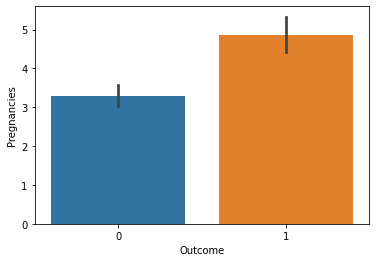

In [9]:
sns.barplot(x='Outcome',y='Pregnancies',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


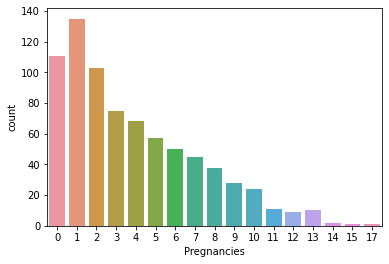

In [10]:
sns.countplot('Pregnancies',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


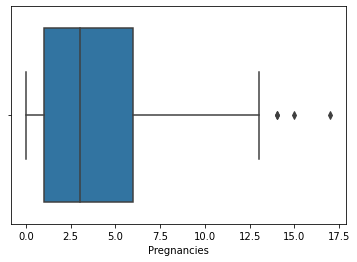

In [11]:
sns.boxplot('Pregnancies',data=df)

In [12]:
cnt = 0
for i in df['Pregnancies']:
    if i > 13:
        cnt = cnt + 1
print(cnt)

4


In [13]:
def countZeros(data):
    cnt = 0
    for i in data:
        if i == 0:
           cnt = cnt + 1
    return cnt

# Glucose

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


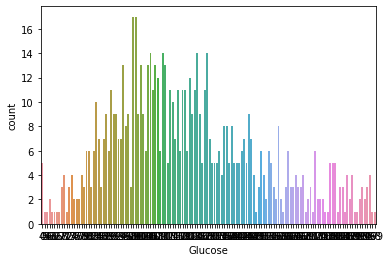

In [14]:
sns.countplot('Glucose',data=df)

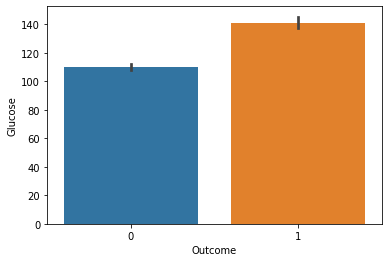

In [15]:
sns.barplot(x='Outcome',y='Glucose',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


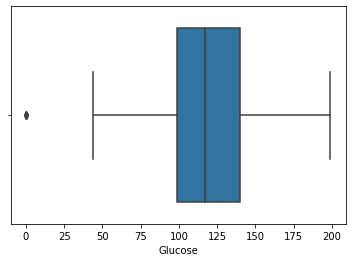

In [16]:
sns.boxplot('Glucose',data=df)

In [17]:
print(countZeros(df['Glucose']))

5


In [18]:
def replaceWithNull(col):
    value = col[0]
    if value == 0:
        return np.nan
    else:
        return value
    
df['Glucose'] = df[['Glucose']].apply(replaceWithNull,axis=1)

In [19]:
df['Glucose'] .isnull().sum()

5

In [20]:
mean = df['Glucose'].mean()

In [21]:
def replaceNullWithMean(col):
    val = col[0]
    if pd.isnull(val):
        return mean
    else:
        return val
    
df['Glucose'] = df[['Glucose']].apply(replaceNullWithMean,axis=1)

In [22]:
df['Glucose'] .isnull().sum()

0

#  BloodPressure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


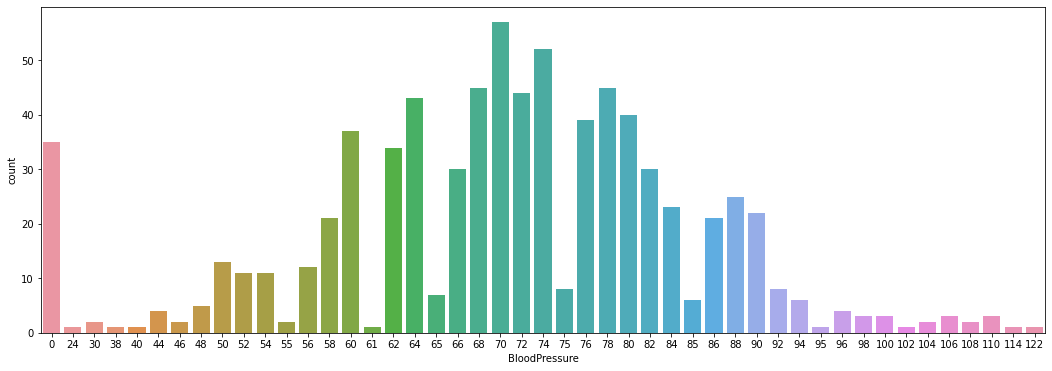

In [23]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot('BloodPressure',data=df,ax=ax)

In [24]:
c = 0
for i in df['BloodPressure']:
    if (0 <= i < 38) or (108 <= i < 130):
        c = c + 1
        
print(c)
        

45


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


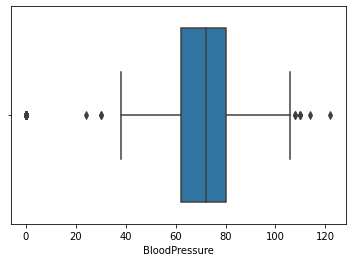

In [25]:
sns.boxplot('BloodPressure',data=df)

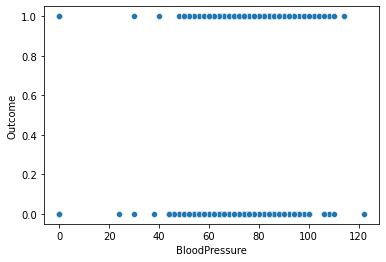

In [26]:
sns.scatterplot(y='Outcome',x='BloodPressure',data=df)

# SkinThickness

In [27]:
print(countZeros(df['SkinThickness']))

227


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


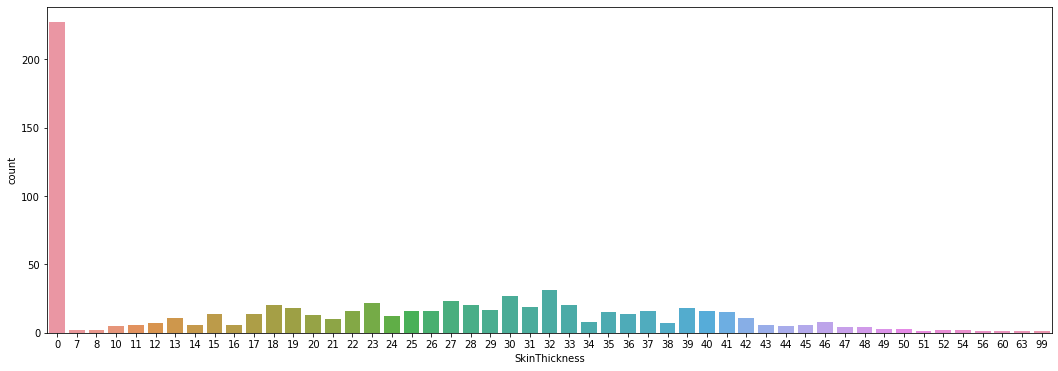

In [28]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot('SkinThickness',data=df,ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


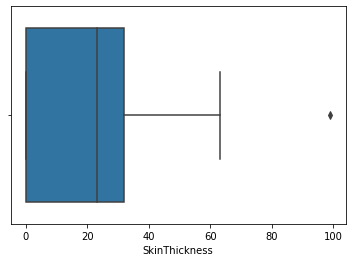

In [29]:
sns.boxplot('SkinThickness',data=df)

# Insulin

In [30]:
print(countZeros(df['Insulin']))

374


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


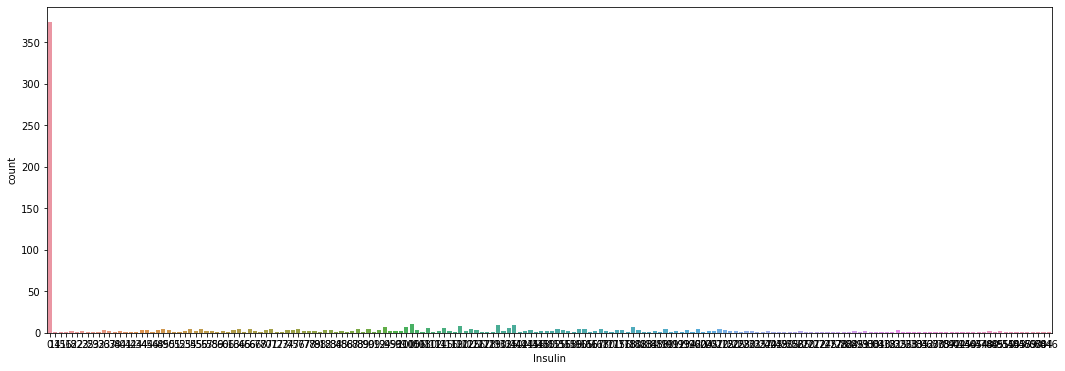

In [31]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot('Insulin',data=df,ax=ax)

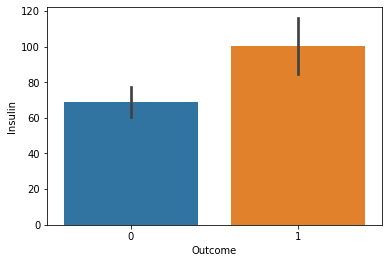

In [32]:
sns.barplot(x= 'Outcome',y='Insulin',data=df)

# BMI

In [33]:
print(countZeros(df['BMI']))

11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


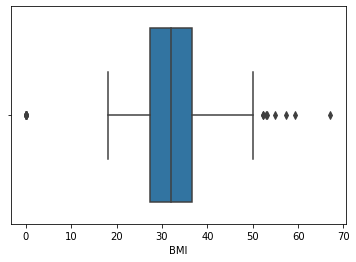

In [34]:
sns.boxplot('BMI',data=df)

In [35]:
cnt = 0
for i in df['BMI']:
    if i > 50:
        cnt = cnt + 1
        
print(cnt)    

8


(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 10 Patch objects>)

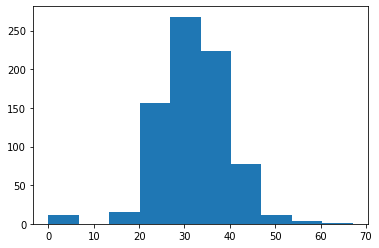

In [36]:
plt.hist(df['BMI'],bins=10)

In [37]:
mean_bmi = df['BMI'].mean()

In [38]:
df['BMI'] = df[['BMI']].apply(replaceWithNull,axis=1)

In [39]:
print(countZeros(df['BMI']))

0


In [40]:
df['BMI'].isnull().sum()

11

In [41]:
def replaceNullWithMeanBMI(col):
    val = col[0]
    if pd.isnull(val):
        return mean_bmi
    else:
        return val
    
df['BMI'] = df[['BMI']].apply(replaceNullWithMeanBMI,axis=1)

# DiabetesPedigreeFunction

In [42]:
print(countZeros(df['DiabetesPedigreeFunction']))

0


(array([318., 206., 136.,  58.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <a list of 10 Patch objects>)

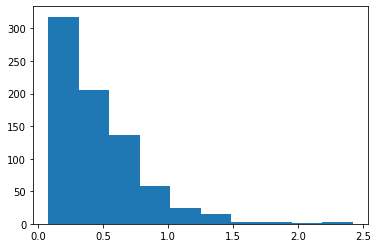

In [43]:
plt.hist(df['DiabetesPedigreeFunction'],bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


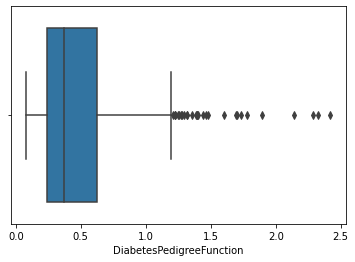

In [44]:
sns.boxplot('DiabetesPedigreeFunction',data=df)

In [45]:
cnt = 0
for i in df['DiabetesPedigreeFunction']:
    if 1.2 < i :
        cnt = cnt + 1
        
print(cnt)

29


# Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


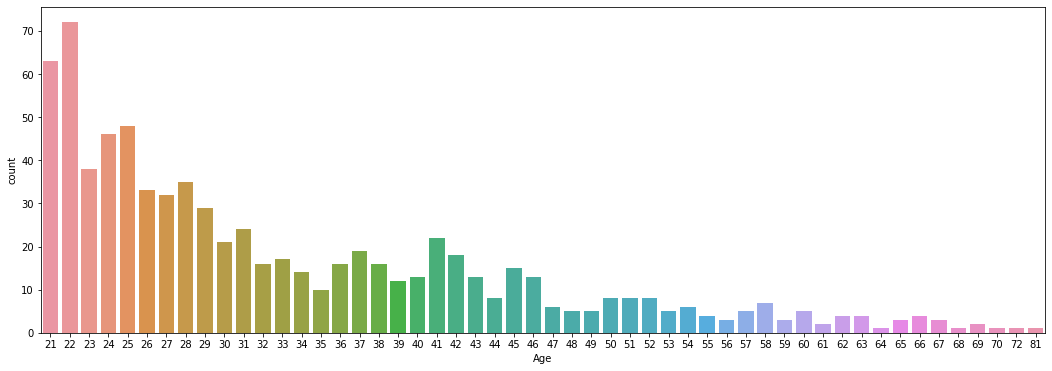

In [46]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot('Age',data=df,ax=ax)

# Removing Outliers

In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [48]:
def removeOutlier(col):
    value = col[0]
    if value > 13:
        return np.nan
    else:
        return value 

df['Pregnancies'] = df[['Pregnancies']].apply(removeOutlier,axis=1)

In [49]:
def removeOutlierBloodPressure(col):
    value = col[0]
    if (0 <= value < 38) or (108 <= value < 130):
        return np.nan
    else:
        return value 

df['BloodPressure'] = df[['BloodPressure']].apply(removeOutlierBloodPressure,axis=1)

In [50]:
def removeOutlierBMI(col):
    value = col[0]
    if value > 50:
        return np.nan
    else:
        return value 

df['BMI'] = df[['BMI']].apply(removeOutlierBMI,axis=1)

In [51]:
def removeOutlierDPF(col):
    value = col[0]
    if 1.2 < value :
        return np.nan
    else:
        return value 

df['DiabetesPedigreeFunction'] = df[['DiabetesPedigreeFunction']].apply(removeOutlierDPF,axis=1)

In [52]:
df.isnull().sum()

Pregnancies                  4
Glucose                      0
BloodPressure               45
SkinThickness                0
Insulin                      0
BMI                          8
DiabetesPedigreeFunction    29
Age                          0
Outcome                      0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               686 non-null    float64
 1   Glucose                   686 non-null    float64
 2   BloodPressure             686 non-null    float64
 3   SkinThickness             686 non-null    int64  
 4   Insulin                   686 non-null    int64  
 5   BMI                       686 non-null    float64
 6   DiabetesPedigreeFunction  686 non-null    float64
 7   Age                       686 non-null    int64  
 8   Outcome                   686 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 53.6 KB


In [56]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130486,0.219619,-0.091116,-0.076407,0.038247,0.012622,0.552411,0.225146
Glucose,0.130486,1.000000,0.206745,0.055579,0.342258,0.195986,0.077161,0.275340,0.496751
BloodPressure,0.219619,0.206745,1.000000,0.027961,-0.053565,0.293080,0.018405,0.343300,0.175212
SkinThickness,-0.091116,0.055579,0.027961,1.000000,0.422276,0.398025,0.148636,-0.132087,0.068021
Insulin,-0.076407,0.342258,-0.053565,0.422276,1.000000,0.179224,0.165385,-0.037966,0.157822
BMI,0.038247,0.195986,0.293080,0.398025,0.179224,1.000000,0.136586,0.040571,0.278764
DiabetesPedigreeFunction,0.012622,0.077161,0.018405,0.148636,0.165385,0.136586,1.000000,0.038448,0.170805
Age,0.552411,0.275340,0.343300,-0.132087,-0.037966,0.040571,0.038448,1.000000,0.258842
Outcome,0.225146,0.496751,0.175212,0.068021,0.157822,0.278764,0.170805,0.258842,1.000000


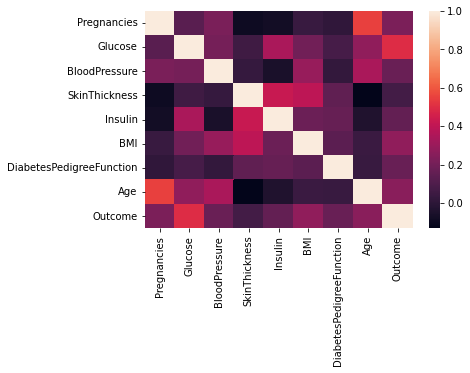

In [57]:
sns.heatmap(df.corr())

In [58]:
df.drop(['SkinThickness','Insulin'],inplace=True,axis=1)

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,33.6,0.627,50,1
1,1.0,85.0,66.0,26.6,0.351,31,0
2,8.0,183.0,64.0,23.3,0.672,32,1
3,1.0,89.0,66.0,28.1,0.167,21,0
5,5.0,116.0,74.0,25.6,0.201,30,0


# Model Building

## Logistic Regression

In [87]:
df.drop('Outcome',axis=1)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,33.6,0.627,50
1,1.0,85.0,66.0,26.6,0.351,31
2,8.0,183.0,64.0,23.3,0.672,32
3,1.0,89.0,66.0,28.1,0.167,21
5,5.0,116.0,74.0,25.6,0.201,30
...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63
764,2.0,122.0,70.0,36.8,0.340,27
765,5.0,121.0,72.0,26.2,0.245,30
766,1.0,126.0,60.0,30.1,0.349,47


In [88]:
df['Outcome']

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 686, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],
                                                test_size=0.30,random_state=101)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [93]:
predictions = model.predict(x_test)

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
accuracy = confusion_matrix(y_test,predictions)

In [96]:
accuracy

array([[112,  24],
       [ 31,  39]])

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_scr = accuracy_score(y_test,predictions)

In [99]:
accuracy_scr

0.7330097087378641

## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
model_tree = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [75]:
predict_tree = model_tree.predict(x_test)

In [76]:
accuracy_tree = confusion_matrix(y_test,predict_tree)

In [77]:
accuracy_tree

array([[98, 38],
       [17, 53]])

In [78]:
accuracy_scr_tree = accuracy_score(y_test,predict_tree)

In [79]:
accuracy_scr_tree

0.7330097087378641